<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [ ]:
# 导入需要的包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 普通回归
# 生成数据

In [2]:
np.random.seed(0)
n_samples,n_features = 100,50
X = np.random.randn(n_samples, n_features)
y = X[:,1]*1  + np.random.randn(n_samples)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [3]:
#利用训练集数据训练模型
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
#利用训练好的模型来进行预测
y_train_hat = lm.predict(X_train)
y_test_hat = lm.predict(X_test)

In [5]:
#预测结果评估
print("参数: ", lm.coef_)
print("训练集 MSE: ", mean_squared_error(y_train,y_train_hat))
print("测试集 MSE: ", mean_squared_error(y_test, y_test_hat))

参数:  [ 0.61014649  1.11849235  0.17546188 -0.4342356  -0.25062264  0.04515621
 -0.196798   -0.21459771 -0.04916267  0.12795972  0.25943971  0.07390042
 -0.20628887  0.62250267 -0.23390423 -0.08817372 -0.14262989 -0.20145494
 -0.05808773 -0.05213177 -0.13329482  0.22629036  0.04034189 -0.24892977
  0.05085811  0.36522364 -0.42565054 -0.04731954 -0.32579373  0.16214127
  0.15660062 -0.13674843 -0.4777063  -0.30083259 -0.03650206  0.00871221
 -0.39860464 -0.21229921  0.04497259 -0.01660277  0.11682385 -0.11767825
  0.18861879  0.20951813 -0.21574121 -0.23197695 -0.004166   -0.05737201
  0.07615383  0.45431255]
训练集 MSE:  0.2855950399277704
测试集 MSE:  3.4181116962639737


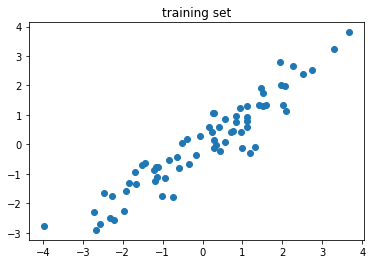

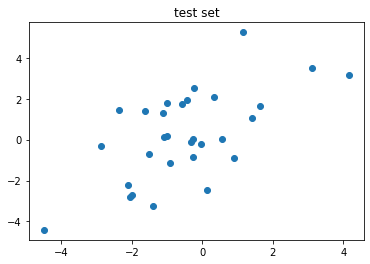

In [7]:
#结果展示
plt.scatter(y_train, y_train_hat)
plt.title("training set")
plt.show()
plt.scatter(y_test, y_test_hat)
plt.title("test set")
plt.show()

参数:  [ 0.28999307  0.89812158  0.14164461 -0.19021464 -0.05785259 -0.05372952
 -0.11679646 -0.1501521  -0.11842168  0.09307954  0.09330086  0.03753771
 -0.21866902  0.31798355 -0.14261852  0.04747513 -0.05367751 -0.01715026
 -0.06391617 -0.03210508 -0.03507757  0.12595163 -0.00840252 -0.10372386
 -0.08527843  0.1512748  -0.1651591   0.03478098 -0.0845273   0.08913861
  0.18982044  0.0273127  -0.25441664 -0.12845421 -0.13709802  0.02502515
 -0.18371213 -0.08180016  0.02312117 -0.06645685  0.24916362 -0.07100293
  0.12675218  0.19025905 -0.06961026 -0.02201008 -0.11631571  0.06452622
  0.06395802  0.18868293]
训练集 MSE:  0.3904730515178669
测试集 MSE:  1.3991764713997938


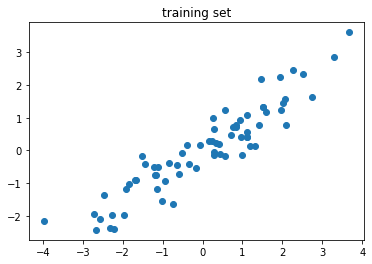

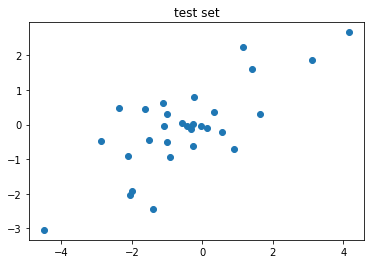

In [177]:
#岭回归
#生成数据
np.random.seed(0)
n_samples,n_features = 100,50
X = np.random.randn(n_samples, n_features)
y = X[:,1]*1  + np.random.randn(n_samples)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

#利用训练数据熟练模型
rlm = Ridge(alpha=10.0)
rlm.fit(X_train,y_train)

#利用训练好的模型来进行预测
y_train_hat = rlm.predict(X_train)
y_test_hat = rlm.predict(X_test)

#预测结果评估
print("参数: ", rlm.coef_)
print("训练集 MSE: ", mean_squared_error(y_train,y_train_hat))
print("测试集 MSE: ", mean_squared_error(y_test, y_test_hat))

#结果展示
plt.scatter(y_train, y_train_hat)
plt.title("training set")
plt.show()
plt.scatter(y_test, y_test_hat)
plt.title("test set")
plt.show()

参数:  [ 0.01106237  1.14284987  0.15714925 -0.08426781 -0.          0.
 -0.         -0.         -0.02528296  0.12969093  0.         -0.
 -0.06783852  0.04032886 -0.         -0.         -0.          0.
 -0.00717563 -0.         -0.          0.         -0.         -0.
 -0.          0.         -0.          0.         -0.02739436  0.00223822
  0.10257578  0.         -0.10634902 -0.         -0.          0.
 -0.          0.         -0.         -0.          0.24553131 -0.
  0.          0.07492899 -0.          0.00127896 -0.04280843  0.
 -0.          0.        ]
训练集 MSE:  0.6982770805048121
测试集 MSE:  0.9810521419345412


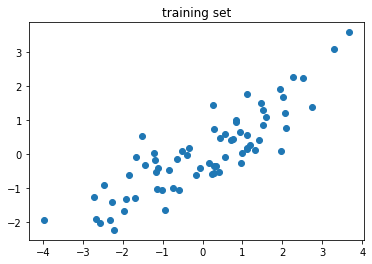

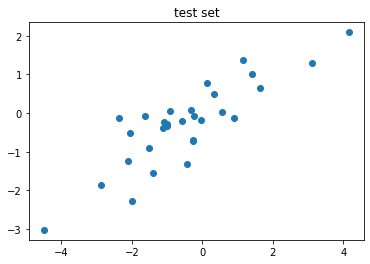

In [182]:
#Lasso回归
#生成数据
np.random.seed(0)
n_samples,n_features = 100,50
X = np.random.randn(n_samples, n_features)
y = X[:,1]*1  + np.random.randn(n_samples)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

#利用训练数据熟练模型
llm = Lasso(alpha=0.1)
llm.fit(X_train,y_train)

#利用训练好的模型来进行预测
y_train_hat = llm.predict(X_train)
y_test_hat = llm.predict(X_test)

#预测结果评估
print("参数: ", llm.coef_)
print("训练集 MSE: ", mean_squared_error(y_train,y_train_hat))
print("测试集 MSE: ", mean_squared_error(y_test, y_test_hat))

#结果展示
plt.scatter(y_train, y_train_hat)
plt.title("training set")
plt.show()
plt.scatter(y_test, y_test_hat)
plt.title("test set")
plt.show()

-10.0
-9.310344827586206
-8.620689655172413
-7.931034482758621
-7.241379310344827
-6.551724137931034
-5.862068965517241
-5.172413793103448
-4.482758620689655
-3.793103448275861
-3.1034482758620685
-2.413793103448276
-1.7241379310344822
-1.0344827586206886
-0.3448275862068968
0.3448275862068968
1.0344827586206904
1.724137931034484
2.4137931034482776
3.1034482758620694
3.793103448275863
4.482758620689657
5.172413793103448
5.862068965517242
6.551724137931036
7.241379310344829
7.931034482758623
8.620689655172416
9.310344827586206
10.0
[array([ 0.61014158,  1.11849111,  0.17546086, -0.43423199, -0.25061884,
        0.04515503, -0.19679775, -0.21459747, -0.04916345,  0.12795869,
        0.25943722,  0.07389947, -0.20629011,  0.62249878, -0.23390308,
       -0.08817162, -0.14262807, -0.20145165, -0.05808733, -0.05213092,
       -0.13329355,  0.22629007,  0.04034099, -0.24892799,  0.05085495,
        0.36521947, -0.42564524, -0.04731864, -0.32578953,  0.16214079,
        0.15660144, -0.1367466

Text(0, 0.5, 'Coefficients')

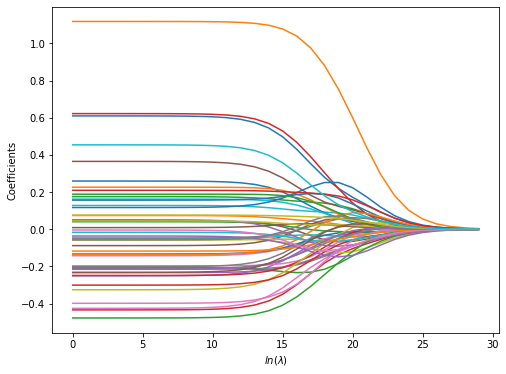

In [4]:
#超参数的变化对回归系数的影响
#生成数据
np.random.seed(0)
n_samples,n_features = 100,50
X = np.random.randn(n_samples, n_features)
y = X[:,1]*1  + np.random.randn(n_samples)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

def get_coef(alpha = 1.0):
    rlm = Ridge(alpha)
    rlm.fit(X_train,y_train)
    return rlm.coef_

#计算不同lambda条件下的回归系数
coefs = []
for ln_lmda in np.linspace(-10,10,30):
    print(ln_lmda)
    lmda = np.exp(ln_lmda)    
    coef = get_coef(lmda)
    coefs.append(coef)

#展示结果
print(coefs)
plt.figure(figsize = (8,6))
plt.plot(coefs)
plt.xlabel("$ln(\lambda)$")
plt.ylabel("Coefficients")
    